In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import math as m
import numpy as np
import lmfit
import os
from uncertainties import ufloat
from uncertainties import unumpy
from pathlib import Path

In [2]:

def gausone(x,m1,s1,scale1=1):
    return scale1*1/(s1**2*2*m.pi)**0.5 * m.e**(-(x-m1)**2/(2*s1**2))

In [3]:

gausone_model = lmfit.Model(gausone)
gausone_params = gausone_model.make_params()

In [4]:
gausone_params['m1'].set(76.4)
gausone_params['s1'].set(1)
gausone_params['scale1'].set(1)

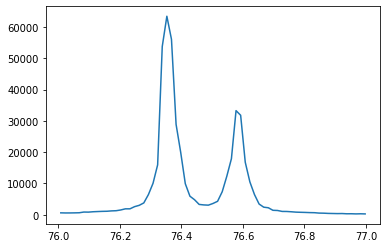

In [5]:
path =  'Data/Si331_40kV_40mA.xy'
with open(path) as tf:
    data = np.loadtxt(tf,delimiter=" ").T
datan=[[],[]]
for i in range(len(data[0])):
    if 76 < data[0,i] < 77:
        datan[0].append(data[0][i])
        datan[1].append(data[1][i])
data=datan

plt.plot(data[0],data[1])
plt.show()

In [7]:
gaus_fit = gausone_model.fit(data[1],x=data[0],params=gausone_params)

[[Model]]
    Model(gausone)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 97
    # data points      = 67
    # variables        = 3
    chi-square         = 3.4935e+09
    reduced chi-square = 54586596.8
    Akaike info crit   = 1196.55579
    Bayesian info crit = 1203.16987
[[Variables]]
    m1:      76.3558270 +/- 0.00237262 (0.00%) (init = 76)
    s1:      0.02442444 +/- 0.00237262 (9.71%) (init = 1)
    scale1:  3875.55072 +/- 326.068331 (8.41%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(s1, scale1) = 0.577


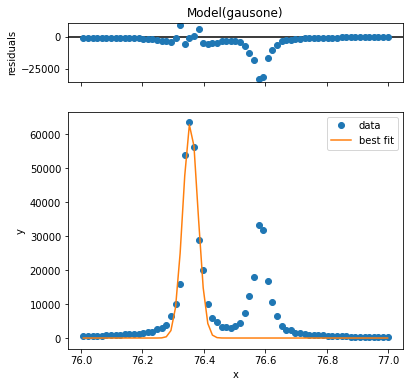

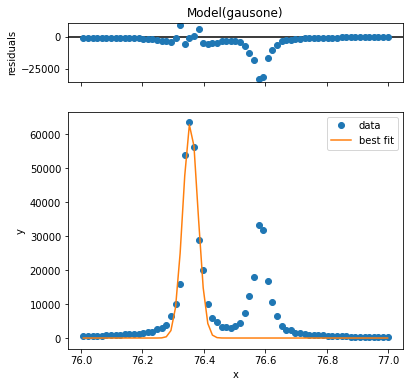

In [8]:
print(gaus_fit.fit_report())
gaus_fit.plot()

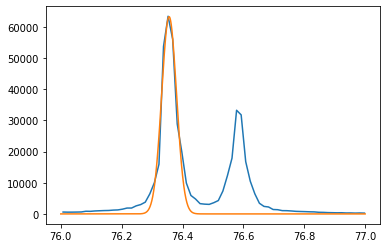

In [9]:
data[1]=data[1]+np.full(len(data[1]),10)
plt.plot(data[0],data[1])
plt.plot(np.arange(76,77,0.0001),gaus_fit.eval(x=np.arange(76,77,0.0001)))